In [1]:
from copy import deepcopy
import glob
import os
from typing import List

import music21
from music21.note import GeneralNote, Note
from music21.chord import Chord

from pysong.core.note import Note as PyNote
from pysong.core.note import Accidental as PyAccidental
from pysong.core.duration import Duration
from pysong.core.note_sequence import NoteSequence


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# import importlib
# importlib.reload(PyNote)
# # importlib.reload(pysong.core.duration)
# importlib.reload(pysong.core.note_sequence)

In [4]:
FLAT = '\u266D'
NATURAL = '\u266E'
SHARP = '\u266F'
FLAT, NATURAL, SHARP

('♭', '♮', '♯')

In [5]:
def unicode_note_name(note: Note):
    return note.nameWithOctave.replace('-', FLAT).replace('#', SHARP)

In [6]:
ROOT_PATH = '/Users/eric/git/mcma/mcma/'
composer_paths = glob.glob(os.path.join(ROOT_PATH, '*'))
composer_paths

['/Users/eric/git/mcma/mcma/buxtehude_d',
 '/Users/eric/git/mcma/mcma/albinoni_t',
 '/Users/eric/git/mcma/mcma/bach_js',
 '/Users/eric/git/mcma/mcma/lully_jb',
 '/Users/eric/git/mcma/mcma/becker_d']

In [7]:
COMPOSER = 'bach_js'

In [8]:
glob.glob(os.path.join(ROOT_PATH, COMPOSER, '*'))

['/Users/eric/git/mcma/mcma/bach_js/the_well-tempered_clavier_book_II',
 '/Users/eric/git/mcma/mcma/bach_js/the_well-tempered_clavier_book_I',
 '/Users/eric/git/mcma/mcma/bach_js/sinfonias',
 '/Users/eric/git/mcma/mcma/bach_js/well_tempered_clavier',
 '/Users/eric/git/mcma/mcma/bach_js/goldberg_variations',
 '/Users/eric/git/mcma/mcma/bach_js/kunst_der_fuge',
 '/Users/eric/git/mcma/mcma/bach_js/inventions']

In [9]:
COLLECTION = 'inventions'

In [10]:
glob.glob(os.path.join(ROOT_PATH, COMPOSER, COLLECTION, '*'))

['/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV780.mxl',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV781.mxl',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV783.mxl',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/normalized',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV782.mxl',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV779.mxl',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV786.mxl',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV778.mxl',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV785.mxl',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV784.mxl',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV776.mxl',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV777.mxl',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV775.mxl',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV774.mxl',
 '/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV773.mxl',
 '

In [11]:
WORK = 'BachJS-BWV772'

In [12]:
path = os.path.join(ROOT_PATH, COMPOSER, COLLECTION, WORK +'.mxl')
path

'/Users/eric/git/mcma/mcma/bach_js/inventions/BachJS-BWV772.mxl'

In [13]:
sc = music21.converter.parse(path)
sc

<music21.stream.Score 0x10feffa30>

In [14]:
[e for e in sc.parts]

[<music21.stream.Part Grand Piano>, <music21.stream.Part Grand Piano>]

In [15]:
part = sc.parts[0]
part

<music21.stream.Part Grand Piano>

In [16]:
measures = [m for m in part.getElementsByClass('Measure')]

In [17]:
notes_and_chords = [n for n in part.recurse().notes]

In [39]:
[(i, x.pitch) for i, x in enumerate(notes_and_chords) if x.isNote]

[(0, <music21.pitch.Pitch C4>),
 (1, <music21.pitch.Pitch D4>),
 (2, <music21.pitch.Pitch E4>),
 (3, <music21.pitch.Pitch F4>),
 (4, <music21.pitch.Pitch D4>),
 (5, <music21.pitch.Pitch E4>),
 (6, <music21.pitch.Pitch C4>),
 (7, <music21.pitch.Pitch G4>),
 (8, <music21.pitch.Pitch C5>),
 (9, <music21.pitch.Pitch B4>),
 (10, <music21.pitch.Pitch C5>),
 (11, <music21.pitch.Pitch D5>),
 (12, <music21.pitch.Pitch G4>),
 (13, <music21.pitch.Pitch A4>),
 (14, <music21.pitch.Pitch B4>),
 (15, <music21.pitch.Pitch C5>),
 (16, <music21.pitch.Pitch A4>),
 (17, <music21.pitch.Pitch B4>),
 (18, <music21.pitch.Pitch G4>),
 (19, <music21.pitch.Pitch D5>),
 (20, <music21.pitch.Pitch G5>),
 (21, <music21.pitch.Pitch F5>),
 (22, <music21.pitch.Pitch G5>),
 (23, <music21.pitch.Pitch E5>),
 (24, <music21.pitch.Pitch A5>),
 (25, <music21.pitch.Pitch G5>),
 (26, <music21.pitch.Pitch F5>),
 (27, <music21.pitch.Pitch E5>),
 (28, <music21.pitch.Pitch G5>),
 (29, <music21.pitch.Pitch F5>),
 (30, <music21.pitch

In [48]:
dir(notes_and_chords[128].pitch)

['_DOC_ATTR',
 '_DOC_ORDER',
 '__class__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accidental',
 '_getAccidental',
 '_getDiatonicNoteNum',
 '_getEnharmonicHelper',
 '_getFreq440',
 '_getFrequency',
 '_getGroups',
 '_getImplicitOctave',
 '_getMicrotone',
 '_getMidi',
 '_getName',
 '_getNameWithOctave',
 '_getOctave',
 '_getPitchClass',
 '_getPitchClassString',
 '_getPs',
 '_getSpanishCardinal',
 '_getSpanishSolfege',
 '_getStep',
 '_groups',
 '_microtone',
 '_nameInKeySignature',
 '_octave',
 '_overridden_freq440',
 '_setAccidental',
 '_setDiatonicNoteNum',
 '_setFreq440',
 '_setFrequency',
 '_setGroups',
 '_setMicrotone',
 '_setMidi',
 '_setName',
 '_setNa

In [60]:
notes_and_chords[124].pitch.name[0]

'F'

In [21]:
from decimal import Decimal

In [22]:
from fractions import Fraction

In [23]:
f = Fraction("1.333").limit_denominator(128)

In [24]:
f.numerator

4

In [25]:
Decimal("3.333").as_integer_ratio()

(3333, 1000)

In [26]:
8/3

2.6666666666666665

In [27]:
ties = [x.tie for x in notes_and_chords if x.tie is not None]

In [28]:
ties[0].type

'start'

In [29]:
def print_notes(notes):
    for n in notes:
        print(f'[m{n.measureNumber}: {n.offset}] {unicode_note_name(n)} {n.duration.fullName} [{n.duration.quarterLength}], {n.tie}')

In [65]:
def print_pynotes(notes):
    for n in notes:
        print(n)

In [30]:
def note_dist(note1: Note, note2: Note) -> int:
    return abs(note1.pitch.midi - note2.pitch.midi)

def max_note(note1: Note, note2: Note) -> Note:
    if note1.pitch.midi > note2.pitch.midi:
        return note1
    return note2

def min_note(note1: Note, note2: Note) -> Note:
    if note1.pitch.midi < note2.pitch.midi:
        return note1
    return note2

def pick_note(note_or_chord: GeneralNote, prev, bias_higher_notes) -> Note:
    # If we have a note, just use it.
    if note_or_chord.isNote:
        return note_or_chord
    
    # If we have a chord, make a decision.
    assert note_or_chord.isChord
    chord = note_or_chord
    
    if not prev:
        # No previous note; use top or bottom note as desired.
        if bias_higher_notes:
            return chord[0]
        else:
            return chord[-1]

    # We have a previous note, so find the closest items in chord to it.
    chord.sortAscending(inPlace=True)
    
    argmin = chord[0]
    min_dist = note_dist(chord[0], prev)
    for note in chord.notes[1:]:
        dist = note_dist(note, prev)
        if dist < min_dist:
            min_dist = dist
            argmin = note
        if dist == min_dist:
            if bias_higher_notes:
                argmin = max_note(argmin, note)
            else:
                argmin = min_note(argmin, note)
    return argmin
        

def make_monophonic_music21(part, notes_and_chords: music21.stream.Stream, bias_higher_notes=True) -> List[Note]:
    """Given a stream returned by music21 Stream.notes, which may include Note or Chord objects,
    convert to notes only. Follow the melody left to right and pick closest note to previous, or highest 
    if bias_higher_note==True (picks lowest note, if False).
    
    Returns a new music21 stream containing the measures and notes.
    """
    #notes_and_chords_list = list(notes_and_chords)
    prev_note = None
    notes = deepcopy(notes_and_chords)
    for nc in notes:
        note = pick_note(nc, prev_note, bias_higher_notes)

        notes.replace(nc, note)
        prev_note = note
    return notes

In [31]:
def toAccidental(note21: Note) -> PyAccidental:
    if not note21.pitch.accidental:
        return PyAccidental.Natural 
    a = note21.pitch.accidental.name
    if a == 'flat': return PyAccidental.Flat 
    if a == 'sharp': return PyAccidental.Sharp 
    if a == 'natural': return PyAccidental.Natural 
    if a == 'double-sharp': return PyAccidental.DoubleSharp 
    if a == 'double-flat': return PyAccidental.DoubleFlat
    raise Exception(f'unknown accidental {a}')
    

In [32]:
from fractions import Fraction

In [75]:
def toDuration(note21: Note) -> Duration:
    q = note21.duration.quarterLength
    f = Fraction(q).limit_denominator(128)
    return Duration(f.numerator, f.denominator * 4)

In [85]:
def note21_to_pysong(note: Note) -> PyNote:
    name = note.pitch.name[0]
    acc = toAccidental(note)
    if note.tie:
        tie = note.tie.type=='start' or note.tie.type=='continue'
    else:
        tie = False
    return PyNote(name, acc, note.octave, toDuration(note), tie_to_next=tie)
        

In [86]:
def make_monophonic(part, notes_and_chords: music21.stream.Stream, bias_higher_notes=True) -> List[Note]:
    """Given a stream returned by music21 Stream.notes, which may include Note or Chord objects,
    convert to notes only. Follow the melody left to right and pick closest note to previous, or highest 
    if bias_higher_note==True (picks lowest note, if False).
    
    Returns a new pysong NoteSequence stream containing the notes.
    TODO: return a sequence of measures instead.
    """
    prev_note = None
    
    notes = []
    for nc in notes_and_chords:
        note = pick_note(nc, prev_note, bias_higher_notes)
        pyNote = note21_to_pysong(note)
        notes.append(pyNote)
        prev_note = note
    return notes

In [87]:
def get_monophonic_parts(root_path, composer, collection, work):
    path = os.path.join(root_path, composer, collection, work +'.mxl')
    sc = music21.converter.parse(path)
    num_parts = len(sc.parts)
    mono_parts = []
    for i, part in enumerate(sc.parts):
        measures = [m for m in part.getElementsByClass('Measure')]
        notes_and_chords = part.recurse().notes
        # Set the bass line to lower_note preference; higher-note preference otherwise.
        prefer_higher = True if i < num_parts-1 else False
        notes = make_monophonic(part, notes_and_chords, prefer_higher)
        mono_parts.append(notes)
        
    return mono_parts

In [88]:
mono_parts = get_monophonic_parts(ROOT_PATH, COMPOSER, COLLECTION, WORK)
print_pynotes(mono_parts[0])
#for i, notes in enumerate(mono_parts):
#    print(f'\nPart {i+1}:')
#    print_notes(notes)

C4 sixteenth
D4 sixteenth
E4 sixteenth
F4 sixteenth
D4 sixteenth
E4 sixteenth
C4 sixteenth
G4 eighth
C5 eighth
B4 eighth
C5 eighth
D5 sixteenth
G4 sixteenth
A4 sixteenth
B4 sixteenth
C5 sixteenth
A4 sixteenth
B4 sixteenth
G4 sixteenth
D5 eighth
G5 eighth
F5 eighth
G5 eighth
E5 sixteenth
A5 sixteenth
G5 sixteenth
F5 sixteenth
E5 sixteenth
G5 sixteenth
F5 sixteenth
A5 sixteenth
G5 sixteenth
F5 sixteenth
E5 sixteenth
D5 sixteenth
C5 sixteenth
E5 sixteenth
D5 sixteenth
F5 sixteenth
E5 sixteenth
D5 sixteenth
C5 sixteenth
B4 sixteenth
A4 sixteenth
C5 sixteenth
B4 sixteenth
D5 sixteenth
C5 sixteenth
B4 sixteenth
A4 sixteenth
G4 sixteenth
F♯4 sixteenth
A4 sixteenth
G4 sixteenth
B4 sixteenth
A4 eighth
D4 eighth
C5 dotted-eighth
D5 sixteenth
B4 sixteenth
A4 sixteenth
G4 sixteenth
F♯4 sixteenth
E4 sixteenth
G4 sixteenth
F♯4 sixteenth
A4 sixteenth
G4 sixteenth
B4 sixteenth
A4 sixteenth
C5 sixteenth
B4 sixteenth
D5 sixteenth
C5 sixteenth
E5 sixteenth
D5 sixteenth
B4 1/32
C5 1/32
D5 sixteenth
G5 six

C4 D4 E4 F4 D4 E4 C4 G4 C5 B4 C5 D5 G4 A4 B4 C5 A4 B4 G4 D5 G5 F5 G5 E5 A5 G5 F5 E5 G5 F5 A5 G5 F5 E5 D5 C5 E5 D5 F5 E5 D5 C5 B4 A4 C5 B4 D5 C5 B4 A4 G4 F♯4 A4 G4 B4 A4 D4 C5 D5 B4 A4 G4 F♯4 E4 G4 F♯4 A4 G4 B4 A4 C5 B4 D5 C5 E5 D5 B4 C5 D5 G5 B4 A4 G4 G4 G4 A4 B4 C5 A4 B4 G4 F♯4 A4 B4 C5 D5 B4 C5 A4 B4 D5 C5 B4 A4 C5 B4 D5 C5 E5 D5 C5 B4 D5 C♯5 E5 D5 C♯5 D5 E5 F5 A4 B4 C♯5 D5 F♯4 G♯4 A4 B4 C5 D5 D5 E4 F♯4 G♯4 A4 F♯4 G♯4 E4 E5 D5 C5 E5 D5 C5 B4 D5 C5 A5 G♯5 B5 A5 E5 F5 D5 G♯4 F5 E5 D5 C5 B4 A4 A4 A5 G5 F5 E5 G5 F5 A5 G5 G5 E5 F5 G5 A5 F5 G5 E5 F5 F5 G5 F5 E5 D5 F5 E5 G5 F5 F5 D5 E5 F5 G5 E5 F5 D5 E5 E5 C5 D5 E5 F5 D5 E5 C5 D5 E5 F5 G5 A5 F5 G5 E5 F5 G5 A5 B5 C6 A5 B5 G5 C6 G5 E5 D5 C5 C5 B♭4 A4 G4 F4 A4 G4 B♭4 A4 B4 C5 E4 D4 C5 F4 B4 C5


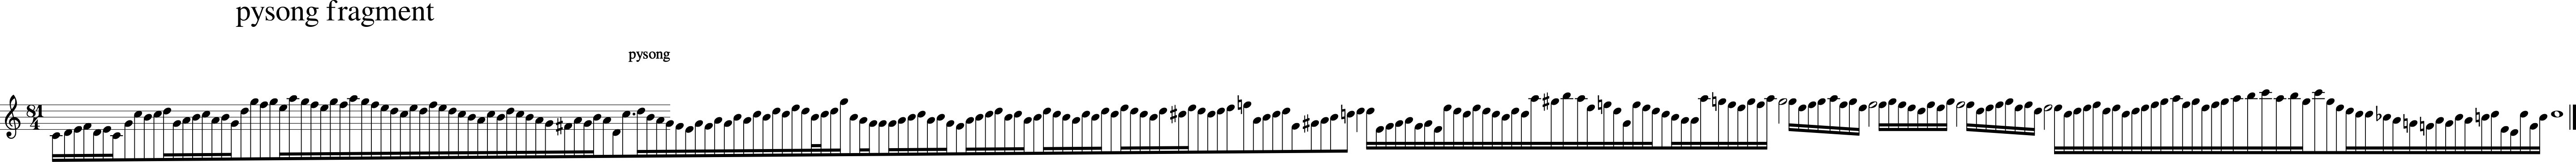

In [91]:
seq = NoteSequence(mono_parts[0])
seq.show()

In [92]:
seq.to_intervals()

[major 2nd,
 major 2nd,
 minor 2nd,
 minor 3rd,
 major 2nd,
 major 3rd,
 perfect 5th,
 perfect 4th,
 minor 2nd,
 minor 2nd,
 major 2nd,
 perfect 5th,
 major 2nd,
 major 2nd,
 minor 2nd,
 minor 3rd,
 major 2nd,
 major 3rd,
 perfect 5th,
 perfect 4th,
 major 2nd,
 major 2nd,
 minor 3rd,
 perfect 4th,
 major 2nd,
 major 2nd,
 minor 2nd,
 minor 3rd,
 major 2nd,
 major 3rd,
 major 2nd,
 major 2nd,
 minor 2nd,
 major 2nd,
 major 2nd,
 major 3rd,
 major 2nd,
 minor 3rd,
 minor 2nd,
 major 2nd,
 major 2nd,
 minor 2nd,
 major 2nd,
 minor 3rd,
 minor 2nd,
 minor 3rd,
 major 2nd,
 minor 2nd,
 major 2nd,
 major 2nd,
 minor 2nd,
 minor 3rd,
 major 2nd,
 major 3rd,
 major 2nd,
 perfect 5th,
 minor 7th,
 major 2nd,
 minor 3rd,
 major 2nd,
 major 2nd,
 minor 2nd,
 major 2nd,
 minor 3rd,
 minor 2nd,
 minor 3rd,
 major 2nd,
 major 3rd,
 major 2nd,
 minor 3rd,
 minor 2nd,
 minor 3rd,
 major 2nd,
 major 3rd,
 major 2nd,
 minor 3rd,
 minor 2nd,
 major 2nd,
 perfect 4th,
 minor 6th,
 major 2nd,
 major 2nd,


In [84]:
print_notes(notes_and_chords)

[m1: 0.25] C4 16th [0.25], None
[m1: 0.5] D4 16th [0.25], None
[m1: 0.75] E4 16th [0.25], None
[m1: 1.0] F4 16th [0.25], None
[m1: 1.25] D4 16th [0.25], None
[m1: 1.5] E4 16th [0.25], None
[m1: 1.75] C4 16th [0.25], None
[m1: 2.0] G4 Eighth [0.5], None
[m1: 2.5] C5 Eighth [0.5], None
[m1: 3.0] B4 Eighth [0.5], None
[m1: 3.5] C5 Eighth [0.5], None
[m2: 0.0] D5 16th [0.25], None
[m2: 0.25] G4 16th [0.25], None
[m2: 0.5] A4 16th [0.25], None
[m2: 0.75] B4 16th [0.25], None
[m2: 1.0] C5 16th [0.25], None
[m2: 1.25] A4 16th [0.25], None
[m2: 1.5] B4 16th [0.25], None
[m2: 1.75] G4 16th [0.25], None
[m2: 2.0] D5 Eighth [0.5], None
[m2: 2.5] G5 Eighth [0.5], None
[m2: 3.0] F5 Eighth [0.5], None
[m2: 3.5] G5 Eighth [0.5], None
[m3: 0.0] E5 16th [0.25], None
[m3: 0.25] A5 16th [0.25], None
[m3: 0.5] G5 16th [0.25], None
[m3: 0.75] F5 16th [0.25], None
[m3: 1.0] E5 16th [0.25], None
[m3: 1.25] G5 16th [0.25], None
[m3: 1.5] F5 16th [0.25], None
[m3: 1.75] A5 16th [0.25], None
[m3: 2.0] G5 16th [

AttributeError: 'Chord' object has no attribute 'nameWithOctave'

In [38]:
sc = music21.converter.parse(path)

In [ ]:
part = sc.parts[0]
part

In [ ]:
measures = [m for m in part.getElementsByClass('Measure')]
notes_and_chords = part.recurse().notes

In [ ]:
note = list(notes_and_chords)[-2]
chord = list(notes_and_chords)[-1]
note, chord

In [ ]:
note.measureNumber

In [ ]:
chord.measureNumber

In [ ]:
notec = chord[0]
notec

In [ ]:
notec.measureNumber

In [ ]:
dir(notec)

In [ ]:
note.containerHierarchy()

In [ ]:
list(note.contextSites())

In [ ]:
note.duration

In [ ]:
notec.duration

In [ ]:
import pysong

In [ ]:
import pysong.core

In [ ]:
from pysong.core import Note

In [ ]:
n = Note()

In [ ]:
n

In [ ]:
a = None
b = ''
c = '42'
seq = [b, a, c]
z = filter(lambda x: x is not None, seq)
list(z)